# Housing Project

## Setting up

In [24]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import sys  
sys.path.insert(0, r'C:\Users\Cora\OneDrive\ML-Preparation\HousingProject')

projectDir = r"C:\Users\Cora\OneDrive\ML-Preparation\HousingProject"+"/"

In [37]:
import pandas as pd
import numpy as np

## The data

In [13]:
raw = pd.read_csv(projectDir+'dataset/housing.csv')

### Exploring the dataset

#### Looking at the data

In [19]:
raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Checking for missing

In [20]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Checking for basic statistics of each field

In [21]:
raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002569D0DEEB8>,
      dtype=object)

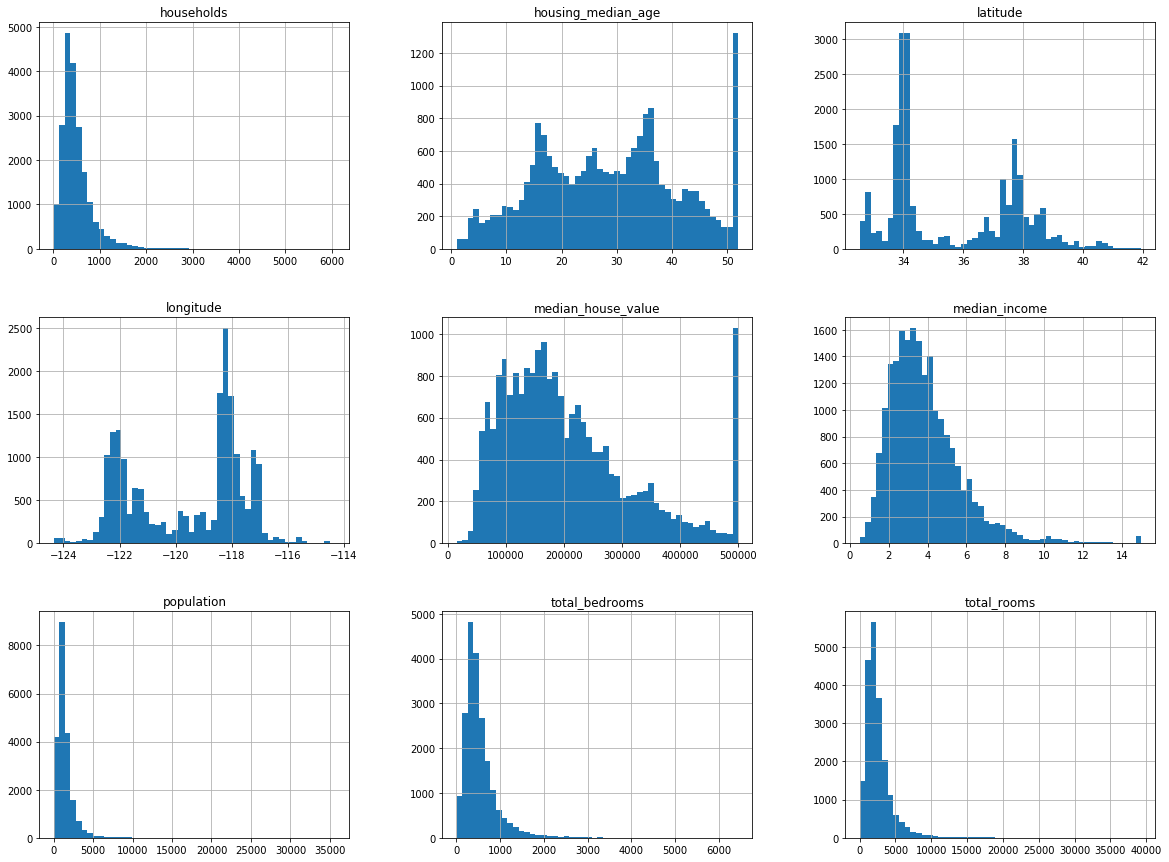

In [26]:
import matplotlib.pyplot as plt

raw.hist(bins=50, figsize=(20,15))


* `housing_median_age`: capped
* `median_house_value`: capped (target variable)
* `median_income`: capped, scaled

## Selecting the Test Set

This selection does not foresee data update.

### Skelearn default train_test_split

In [28]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw, test_size=0.2, random_state=42)

In [31]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [32]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


*train_set* from sklearn does not have any missing value.

### Stratified Sklearn train_test_split

With prior knoledge, one can optimize splits to reflect data distribution characteristics, that will optmize models.

For expert opinion, one knows that the feature `median_income` is very important.

<span style="color:red"> It is not clear the best way to binning your continuum variable into a category for stratification. text</span>.

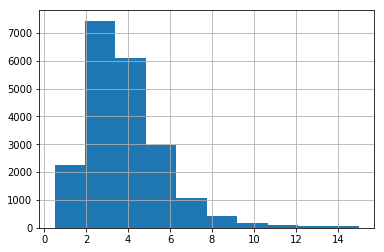

In [39]:
raw.median_income.hist()

The `median_income` distribution, does not match the one shown in the book, which is already categorized. I don't know how the book considered the categorization.

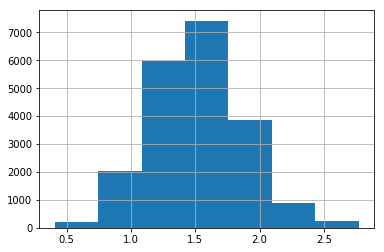

In [113]:
np.log(1+raw.median_income).hist(bins=7)

#### Linear bins for defining cats

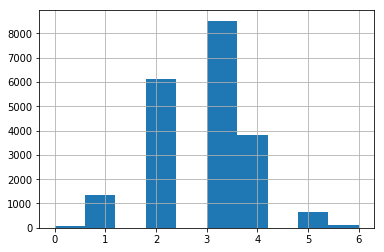

In [125]:
raw['log_median_income'] = np.log(1+raw.median_income)
cats = np.linspace(min(raw.log_median_income),
                   max(raw.log_median_income),
                   7)
raw['median_income_cat'] = np.argmin(abs(np.repeat(cats,len(raw)).reshape((len(cats),len(raw))) - raw.log_median_income.values),0)

raw.median_income_cat.hist()

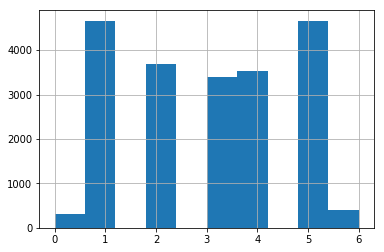

In [128]:
raw['log_median_income'] = np.log(1+raw.median_income)
quantiles = np.linspace(0,100,7)
cats = np.percentile(raw['log_median_income'],quantiles) 

raw['median_income_cat'] = np.argmin(abs(np.repeat(cats,len(raw)).reshape((len(cats),len(raw))) - raw.log_median_income.values),0)

raw.median_income_cat.hist()

In [123]:
percentiles

array([0.40539844, 1.27071513, 1.51178098, 1.74802525, 2.77259497])

In [124]:
cats

array([  0.,  25.,  50.,  75., 100.])

In [126]:
cats

array([0.40539844, 0.79993119, 1.19446395, 1.58899671, 1.98352946,
       2.37806222, 2.77259497])